In [194]:
# The file where training, testing, and visualizing the model takes place

# import our helper files
from model_architecture_staff import *
# switch out this import statement when working with different datasets
from MNIST_preprocessing_staff import *
# for saving training history
import pickle



# for tensorboard
from time import time
from keras.callbacks import TensorBoard

In [195]:
keras.backend.clear_session()

In [196]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(X_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

The shape of each image: (28, 28)
An example training image:


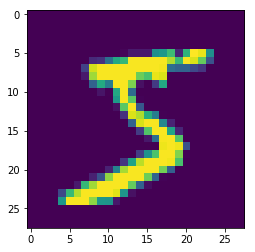

Label: 5


In [197]:
# load our data
(X_train, Y_train), (X_test, Y_test) = preprocess_mnist()

In [198]:
# create our model's architecture
model = create_model(28,28,1,10)

In [199]:
# compile our model and train our model
model.compile(loss=keras.losses.categorical_crossentropy, #
             optimizer=keras.optimizers.Adam(), #students can choose optimizers 
             metrics=['accuracy'])

In [200]:
# experimenting with tensorboard

tensorboard = TensorBoard(log_dir="logs/run_test", write_graph=True)

In [201]:
model.fit(X_train, Y_train, verbose=1, batch_size = 128, epochs=5, validation_data=(X_test,Y_test), callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.3994 - acc: 0.8958 - val_loss: 0.1992 - val_acc: 0.9424
Epoch 2/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.1668 - acc: 0.9528 - val_loss: 0.1266 - val_acc: 0.9661
Epoch 3/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.1150 - acc: 0.9677 - val_loss: 0.1007 - val_acc: 0.9710
Epoch 4/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0897 - acc: 0.9752 - val_loss: 0.0827 - val_acc: 0.9750
Epoch 5/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0757 - acc: 0.9782 - val_loss: 0.0755 - val_acc: 0.9779


In [40]:
# start tensorbaord server (i'm hoping)
!tensorboard --logdir=logs/run_b

/Users/chloeloughridge/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
2018-07-30 10:44:02.143271: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
TensorBoard 1.8.0 at http://Chloes-MacBook-Air-2.local:6006 (Press CTRL+C to quit)
^C


In [15]:
# save the model to a file
model.save("mnistTest01")
# save the training history of the model --> you will submit this in addition to your model
with open('./trainHistory', 'wb') as file_pi:
    pickle.dump(train_history.history, file_pi)

In [20]:
# for staff evaluation eventually
# opening the pickle file
with open('./trainHistory', 'rb') as f:
    history = pickle.load(f)

In [21]:
print(history['val_acc'])

[0.896, 0.9177, 0.9348]


In [22]:
max_val = 0
for acc_score in history['val_acc']:
    if acc_score > max_val:
        max_val = acc_score
        
print(max_val)

0.9348


In [2]:
# checking something with Keras

from keras.datasets import mnist

Using TensorFlow backend.
/Users/chloeloughridge/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [58]:
# copying text automatically to clipboard
import os 
data = 'localhost:{}'.format(6006)
os.system("echo '%s' | pbcopy" % data)

0

In [72]:
# get list of running subprocesses 
import subprocess
data = subprocess.Popen(['ps','aux'], stdout=subprocess.PIPE).stdout.readlines()
print(data)

[b'USER               PID  %CPU %MEM      VSZ    RSS   TT  STAT STARTED      TIME COMMAND\n', b'chloeloughridge  41355  22.3  2.7  4534500 222552   ??  Rs    3:34PM  13:09.96 /System/Library/StagedFrameworks/Safari/WebKit.framework/Versions/A/XPCServices/com.apple.WebKit.WebContent.xpc/Contents/MacOS/com.apple.WebKit.WebContent\n', b'chloeloughridge  40888   7.1  1.1  3906820  93432   ??  S    Sat09PM   3:46.24 /Applications/Safari.app/Contents/MacOS/Safari\n', b'chloeloughridge  41712   5.8  1.2 116877188  96932   ??  Ss    9:37AM  13:27.99 /Users/chloeloughridge/anaconda/bin/python -m ipykernel -f /Users/chloeloughridge/Library/Jupyter/runtime/kernel-c330f836-219b-4c0d-b7ac-31961f599d37.json\n', b'_windowserver      158   5.2  0.5  3837924  45168   ??  Rs   29Jun18 566:19.41 /System/Library/Frameworks/ApplicationServices.framework/Frameworks/CoreGraphics.framework/Resources/WindowServer -daemon\n', b'root                99   2.7  0.0  2473700   2136   ??  Ss   29Jun18  81:01.95 /usr/

In [126]:
# to get the pid of a running subprocess on a given port
!lsof -n -i4TCP:6006

In [123]:
import subprocess, signal
proc = subprocess.Popen(["tensorboard", "--logdir=logs/"])
print(proc.pid)

43920


In [125]:
# killing the subprocess
os.kill(proc.pid, signal.SIGINT)

In [144]:
# viewing the folders in the logs/ directory
command = 'cd ./logs; ls'
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
proc_stdout = str(process.communicate()[0].strip())
print(proc_stdout)

b'run_cifar\nrun_mnist'


In [149]:
import re
pattern = 'mnist'
n = re.findall(pattern, proc_stdout)
print(len(n))

1


In [177]:
# trying to manipulate graphs with keras backend
import keras.backend as K

graph = K.get_default_graph()

AttributeError: module 'keras.backend' has no attribute 'get_default_graph'

In [202]:
proc = subprocess.Popen(["tensorboard", "--logdir=logs/"])
proc_stdout = str(proc.communicate()[0].strip())
print(proc_stdout)

KeyboardInterrupt: 